In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import math
from sklearn.linear_model import LinearRegression

In [5]:
df = pd.read_csv('../Reading/z-score_pH.csv')
df = df.apply(lambda x: x.sort_values().values)
df

,pH 2.17,pH 5.75,pH 7.73,pH 10.36,pH 13.15
0,-3.050934,-2.837965,-3.551116,-3.082781,-3.065045
1,-3.050934,-2.779392,-3.397295,-3.003955,-2.990435
2,-2.922452,-2.637144,-3.225377,-2.992694,-2.705562
3,-2.537006,-2.628777,-3.080603,-2.970172,-2.556343
4,-2.408524,-2.561837,-2.691525,-2.947650,-2.535995
...,...,...,...,...,...
995,2.730757,2.375006,2.556506,2.457577,2.707027
996,2.859239,2.400109,2.800811,2.468837,2.788419
997,2.987721,2.450314,2.963681,2.784142,2.829116
998,3.373167,2.718075,3.262276,2.806664,3.086858


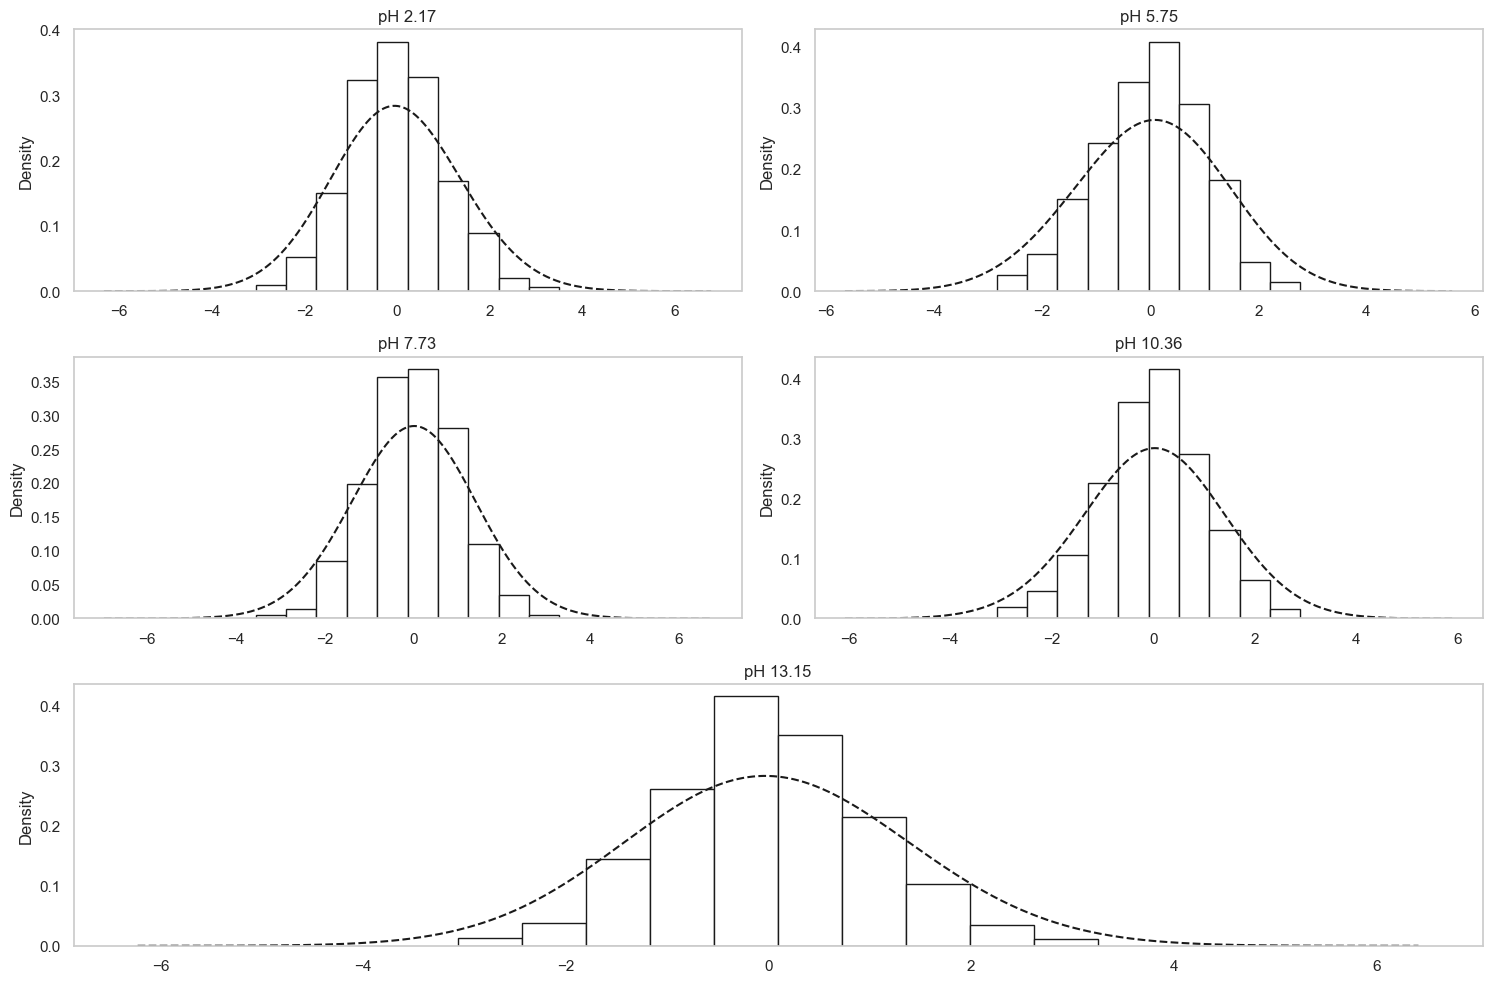

In [48]:
sns.set_style("whitegrid", {'axes.grid' : False})
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(15)

plt.subplot(3, 2, 1)
plt.hist(df['pH 2.17'], density=True, edgecolor='k', color='w')
plt.title('pH 2.17')
df['pH 2.17'].plot.kde(bw_method=1, color='k', linestyle='--')

plt.subplot(3, 2, 2)
plt.hist(df['pH 5.75'], density=True, edgecolor='k', color='w')
plt.title('pH 5.75')
df['pH 5.75'].plot.kde(bw_method=1, color='k', linestyle='--')

plt.subplot(3, 2, 3)
plt.hist(df['pH 7.73'], density=True, edgecolor='k', color='w')
plt.title('pH 7.73')
df['pH 7.73'].plot.kde(bw_method=1, color='k', linestyle='--')

plt.subplot(3, 2, 4)
plt.hist(df['pH 10.36'], density=True, edgecolor='k', color='w')
plt.title('pH 10.36')
df['pH 10.36'].plot.kde(bw_method=1, color='k', linestyle='--')

plt.subplot(3, 1, 3)
plt.hist(df['pH 13.15'], density=True, edgecolor='k', color='w')
plt.title('pH 13.15')
df['pH 13.15'].plot.kde(bw_method=1, color='k', linestyle='--')


plt.tight_layout()
plt.savefig('../Reading/img/distribution_normal_std_relative_error.png')

# Boxplot Relative Error

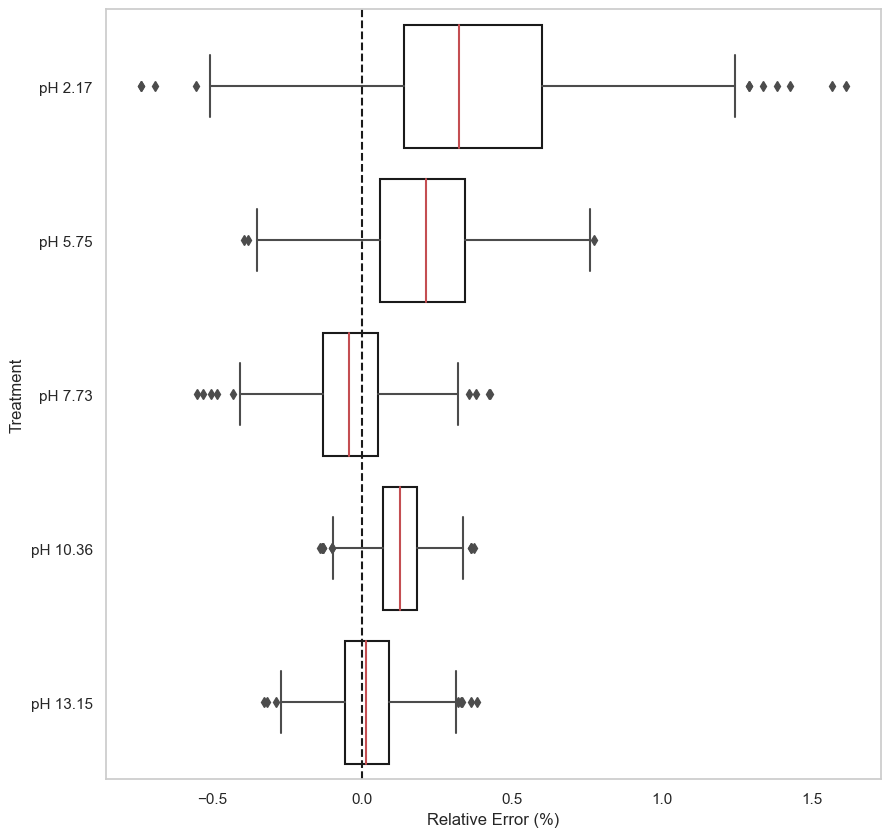

In [53]:
df = pd.read_csv('../Reading/relative_error.csv')
df = df.apply(lambda x: x.sort_values().values)

list_voltage = []
for i in df.columns:
    list_voltage.append(str(i))


df_melt = pd.melt(df.reset_index(), id_vars=['index'], value_vars=list_voltage)
# replace column names
df_melt.columns = ['index', 'voltage', 'value']
df_melt

sns.set(rc={'figure.figsize':(10,10)})
sns.set_style('whitegrid', {'axes.grid' : False})
ax = sns.boxplot(
    x='value', 
    y='voltage', 
    data=df_melt, 
    boxprops = {"edgecolor":'k', 'facecolor':'w'},
    medianprops={"color": "r"},)
ax.set(xlabel='Relative Error (%)', ylabel='Treatment')
plt.axvline(0, color = 'k',linestyle= '--')
plt.savefig('../Reading/img/Boxplot pH distribution.png')
plt.show()

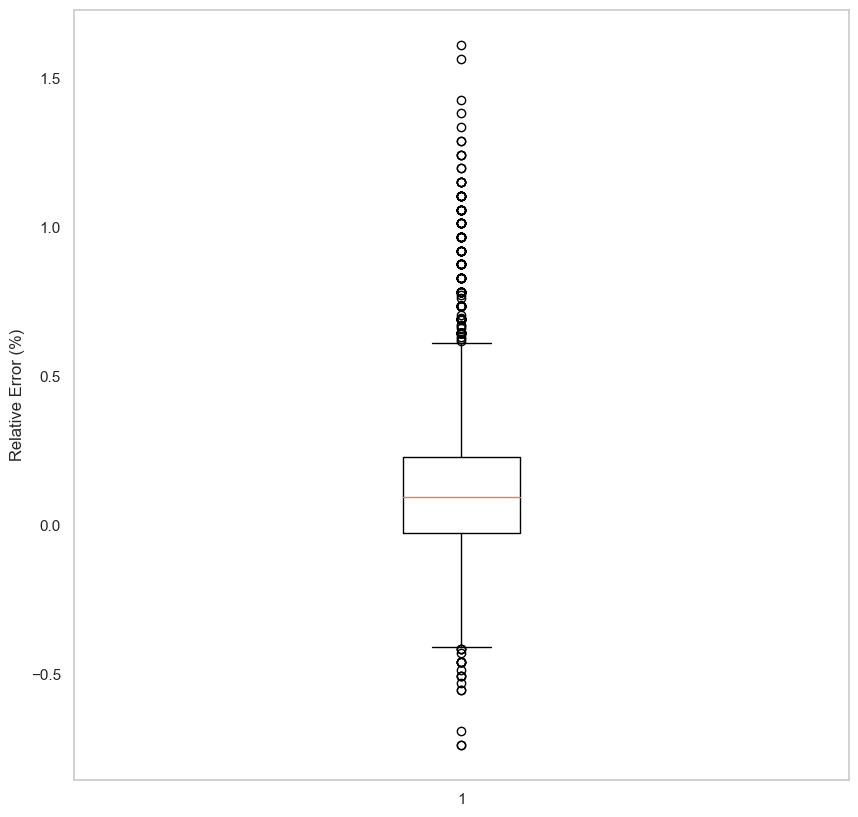

In [55]:

plt.boxplot(df_melt['value'])
plt.ylabel('Relative Error (%)')
plt.savefig('../Reading/img/Boxplot pH distribution relative error (%) single.png')